# Notes on Chapter 8

* This notebook includes the code and simulations used in Chapter 8 on data visualizations

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import string
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
from scipy.stats import norm
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats

# set plotting parameters from the beginning
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 14}
axes = {
        'titlesize' : 22,
        'labelsize' : 20}
figure = {'figsize':(10,4),
         'autolayout':True}
matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes)
matplotlib.rc('figure', **figure)


## bars and lines

In [2]:
# simulate first a time series: a simple AR(1) process: y_t = a + rho y_{t-1} + epsilon_t
np.random.seed(20252)
T = 20
rho = 0.8
intercept = 5
epsilon = np.random.randn(T)
df = pd.DataFrame(index = range(T), columns = ['y'])
for t in range(T):
    if t==0:
        df.y.loc[t] = intercept
    else:
        df.y.loc[t] = intercept + rho*df.y.loc[t-1] + epsilon[t]
        

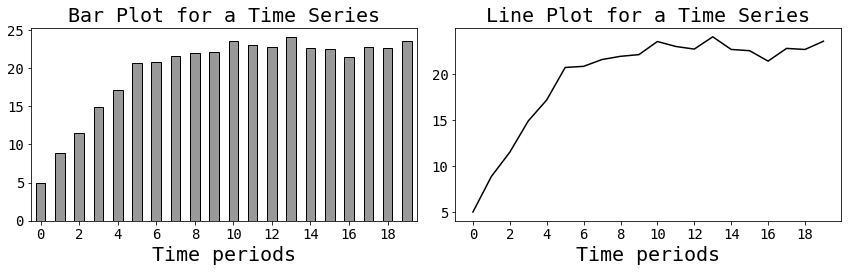

In [3]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
# bar
df.y.plot(kind='bar', ax = ax[0], color = '0.6', edgecolor = 'k')
ax[0].set_title('Bar Plot for a Time Series', fontsize = 20)
ticks = [i for i in range(20) if i%2==0]
# line
df.y.plot(kind='line', ax = ax[1], color = 'k')
ax[1].set_title('Line Plot for a Time Series', fontsize = 20)
# fix xticks and labels
for i in range(2):
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ticks, rotation = 0)
    ax[i].set_xlabel('Time periods')


In [4]:
# simulate first a time series: a simple AR(1) process: y_t = a + rho y_{t-1} + epsilon_t
np.random.seed(20252)
T = 100
rho = 0.8
intercept = 5
epsilon1 = np.random.randn(T)
df1 = pd.DataFrame(index = range(T), columns = ['y'])
for t in range(T):
    if t==0:
        df1.y.loc[t] = intercept
    else:
        df1.y.loc[t] = intercept + rho*df1.y.loc[t-1] + epsilon1[t]
        

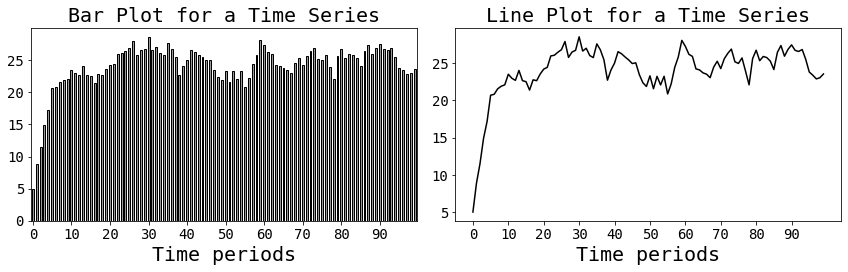

In [5]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
# bar
df1.y.plot(kind='bar', ax = ax[0], color = '0.6', edgecolor = 'k')
ax[0].set_title('Bar Plot for a Time Series', fontsize = 20)
ticks = [i for i in range(T) if i%10==0]
# line
df1.y.plot(kind='line', ax = ax[1], color = 'k')
ax[1].set_title('Line Plot for a Time Series', fontsize = 20)
# fix xticks and labels
for i in range(2):
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ticks, rotation = 0)
    ax[i].set_xlabel('Time periods')


In [6]:
# now let's simulate categorical data
np.random.seed(20462)
num_cats = 10
y = np.random.randn(num_cats)
str_cats = [f'cat_{cat}' for cat in range(num_cats)]
df_cats = pd.DataFrame(y, index = str_cats, columns =['y'])

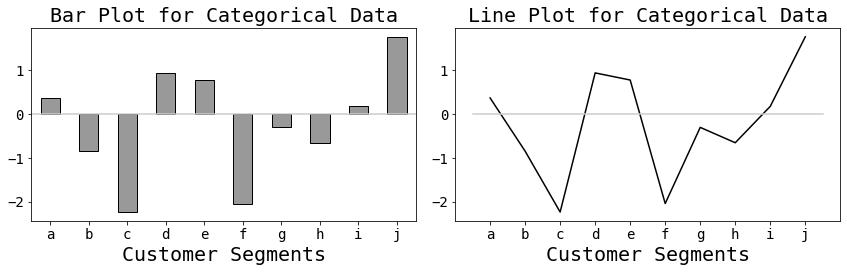

In [7]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
# bar
df_cats.y.plot(kind='bar', ax = ax[0], color = '0.6', edgecolor = 'k')
ax[0].set_title('Bar Plot for Categorical Data', fontsize = 20)
xmin, xmax = ax[0].get_xlim()
ticks = [i for i in range(len(df_cats.y))]
alphabet = list(string.ascii_lowercase)
tickslabels = [letter for i,letter in enumerate(alphabet)]
# line
df_cats.y.plot(kind='line', ax = ax[1], color = 'k')
ax[1].set_title('Line Plot for Categorical Data', fontsize = 20)
# fix xticks and labels
for i in range(2):
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(tickslabels, rotation = 0)
    ax[i].set_xlabel('Customer Segments')
    ax[i].plot([xmin, xmax], [0,0], ls = '-', color = '0.8')


## slopegraphs

In [8]:
def plot_slopegraph(df, ax, alternate_axis = False):
    '''
    Plot a slopegraph.
    df: 
        rows:categories
        columns: time0 and time1
        values: metric value for each category and time period
        index: names of the cateogories
    ax: axis object
    '''
    N = df.shape[0]
    cols = df.columns
    for c, cat in enumerate(df.index):
        y0_c = df[cols[0]].loc[cat]
        y1_c = df[cols[1]].loc[cat]
        ax.plot([1,2],[y0_c,y1_c], color = 'k', alpha = 0.5)
        ax.scatter(1,y0_c, color = 'w', edgecolor = 'k', s = 5)
        ax.scatter(2,y1_c, color = 'w', edgecolor = 'k', s = 5)
        # add labels
        padding = 0.01
        if alternate_axis:
            xc = 1*(1-padding)
            yc = y0_c
            halign = 'right'
            if c%2==0:
                xc = 2*(1+padding)
                yc = y1_c
                halign = 'left'
        else:
            xc = 1*(1-padding)
            yc = y0_c
            halign = 'right'
        ax.text(xc,yc, cat, horizontalalignment = halign, verticalalignment = 'center',
                   weight = 'bold', fontsize = 16)
            
        
    ax.set_xticks([1,2])
    ax.set_xticklabels(['t0', 't1'])
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.axis([0.95*xmin, 1.05*xmax, ymin, ymax])
    return ax

In [9]:
np.random.seed(2822)
num_cats = 5
cats = alphabet[:num_cats]
dfy = pd.DataFrame(100*np.random.randn(num_cats,2), index = cats)

Text(0, 0.5, 'Your metric')

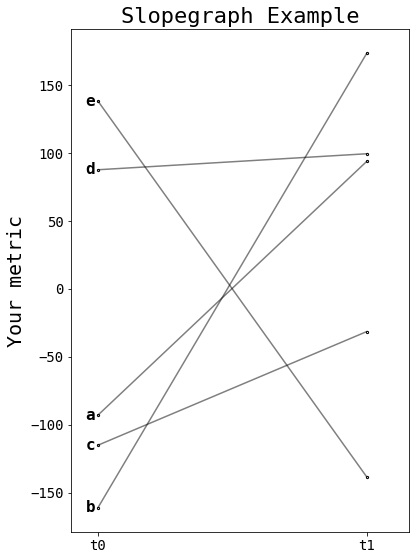

In [10]:
fig, ax = plt.subplots(figsize = (6,8))
plot_slopegraph(df = dfy, ax = ax, alternate_axis = False)
ax.set_title('Slopegraph Example')
ax.set_ylabel('Your metric')

## Waterfall charts

In [234]:
def create_simple_waterfall_chart(init_value, cats_values, cat_labels, ax, sort_cats = True,
                                 fix_scale = False):
    """
    Plot a simple waterfall chart
    """
    if sort_cats:
        ix_sorted = np.argsort(cats_values)
        vals_sorted = cats_values[ix_sorted]
        labs_sorted = np.array(cat_labels)[ix_sorted]
    # plot initial value
    ax.bar(1,init_value, color = '0.2')
    ax.text(1,init_value, np.around(init_value, decimals=1), horizontalalignment = 'center', 
               verticalalignment = 'bottom')
    # plot segments values
    bottom = init_value
    for i in range(1,len(vals_sorted)+1):
        delta_i = vals_sorted[i-1]
        ax.bar(i+1, bottom = bottom, height = delta_i, color = '0.8', edgecolor = 'k')
        height = bottom + delta_i
        if delta_i>0:
            valign = 'bottom'
            ycoord_txt = height
        else:
            valign = 'top'
            ycoord_txt = height
        str_i = str(np.around(delta_i, decimals=1))
        ax.text(i+1, ycoord_txt, str_i, horizontalalignment = 'center', verticalalignment = valign)
        bottom += delta_i
    # plot final value
    final_value = init_value + np.sum(cats_values)
    ax.bar(i+2, final_value, color = '0.2')
    if final_value > 0:
            valign = 'bottom'
    else:
        valign = 'top'
    ax.text(i+2,final_value, np.around(final_value, decimals=1), horizontalalignment = 'center', 
               verticalalignment = valign)
    # fix xticklabels
    labs_nice = ['init'] + list(labs_sorted) + ['final']
    ax.set_xticks(range(1,len(labs_nice)+1))
    ax.set_xticklabels(labs_nice)
    return ax

In [235]:
np.random.seed(19149)
init_value = 100
num_cats = 5
# simulate some deltas
deltas = 30*np.random.randn(num_cats)
deltas_labels = alphabet[:num_cats]
final_value = init_value + np.sum(deltas)
print(deltas, final_value)


[ 24.21209551 -27.77817485  18.39523717   3.19440416  -1.15594595] 116.86761603723771


Text(0.5, 0, 'Customer Segments')

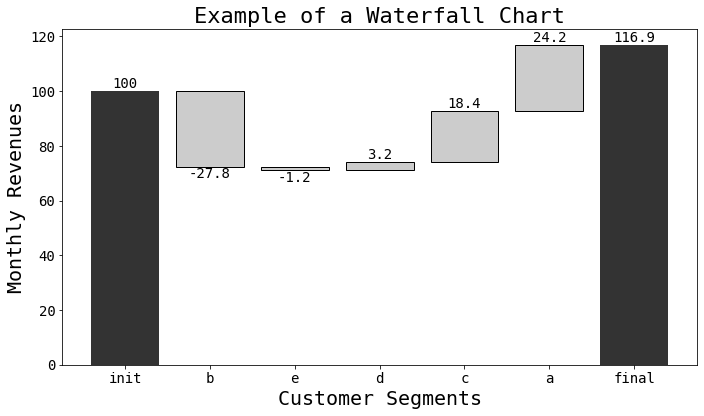

In [236]:
fig, ax = plt.subplots(figsize = (10,6))
create_simple_waterfall_chart(init_value, cats_values = deltas, cat_labels = deltas_labels, ax = ax)
ax.set_title('Example of a Waterfall Chart')
ax.set_ylabel('Monthly Revenues')
ax.set_xlabel('Customer Segments')

[-48.68357323 -24.37212315 -18.67558287  36.55814996 -44.83989928
  21.23297793   0.389085    41.07849454  31.7238633  -39.20171704] 55.20967516663434


Text(0.5, 1.0, 'An Example With More Segments')

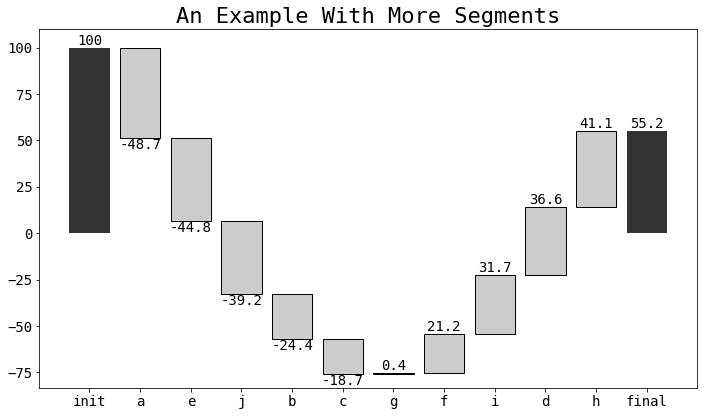

In [237]:
np.random.seed(15261)
init_value = 100
num_cats = 10
# simulate some deltas
deltas = 30*np.random.randn(num_cats)
deltas_labels = alphabet[:num_cats]
final_value = init_value + np.sum(deltas)
print(deltas, final_value)
# plot
fig, ax = plt.subplots(figsize = (10,6))
create_simple_waterfall_chart(init_value, cats_values = deltas, cat_labels = deltas_labels, ax = ax)
# fix manually the axis so that labels fit
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.axis([xmin, xmax, 1.1*ymin, 1.1*ymax])
ax.set_title('An Example With More Segments')

[-4.86835732e+01 -2.43721231e+01 -1.86755829e+01  3.65581500e+01
  1.00000000e+03  2.12329779e+01  3.89084998e-01  4.10784945e+01
  3.17238633e+01 -3.92017170e+01] 1100.0495744485056


Text(0.5, 1.0, 'Problems with different scale')

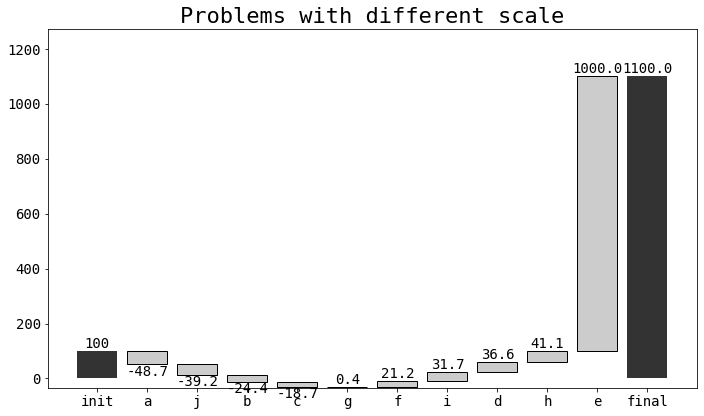

In [238]:
# Careful when one of the bars is considerably different
np.random.seed(15261)
init_value = 100
num_cats = 10
# simulate some deltas
deltas = 30*np.random.randn(num_cats)
# change one of the deltas to get a considerably different scale
deltas[4] = 1000
deltas_labels = alphabet[:num_cats]
final_value = init_value + np.sum(deltas)
print(deltas, final_value)
# plot
fig, ax = plt.subplots(figsize = (10,6))
create_simple_waterfall_chart(init_value, cats_values = deltas, cat_labels = deltas_labels, ax = ax,
                              fix_scale = True)
# fix manually the axis so that labels fit
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.axis([xmin, xmax, 1.1*ymin, 1.1*ymax])
ax.set_title('Problems with different scale')

Text(0.5, 1.0, 'Problems with different scale')

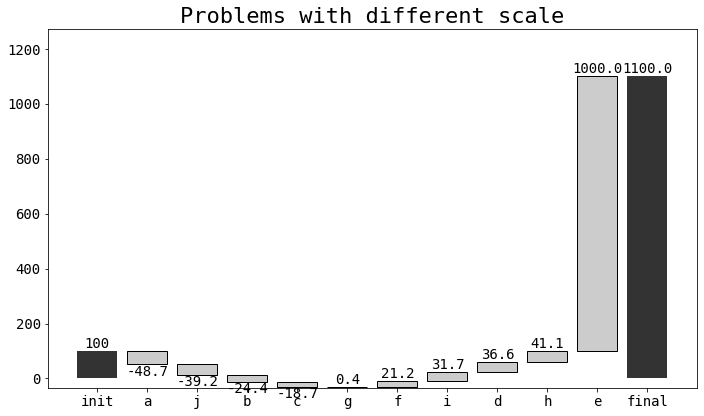

In [191]:
# Can we fix this?
fig, ax = plt.subplots(figsize = (10,6))
create_simple_waterfall_chart(init_value, cats_values = deltas, cat_labels = deltas_labels, ax = ax)
# fix manually the axis so that labels fit
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.axis([xmin, xmax, 1.1*ymin, 1.1*ymax])
ax.set_title('Problems with different scale')

## Scatterplot smoothers

Things I want to plot:
1. Scatterplot with large numbers
2. Hexbin plot
3. Random sampling and scatterplot
4. Scatterplot smoother

In [15]:
# a typical scenario with many observations
np.random.seed(71618)
ord_magnitude = 6
num_obs = int(10**ord_magnitude)
print(f'Number of observations = {num_obs}')
# simulate two correlated normal variables: y = f(x) + noise
intercept = 0
a = 5
b = -10
var_eps = 1000
epsilon = np.sqrt(var_eps)*np.random.randn(num_obs)
var_x = 0.5
# x ~ N(0,varx)
data = pd.DataFrame(np.sqrt(var_x)*np.random.randn(num_obs), columns=['x'])
# y = a + bx + cx^2 + epsilon
data['y'] = intercept + a*data.x + b*data.x**2 + epsilon
data.head(2)

Number of observations = 1000000


,x,y
0,0.069448,45.491330
1,0.180866,-73.660067


Text(0, 0.5, 'Y')

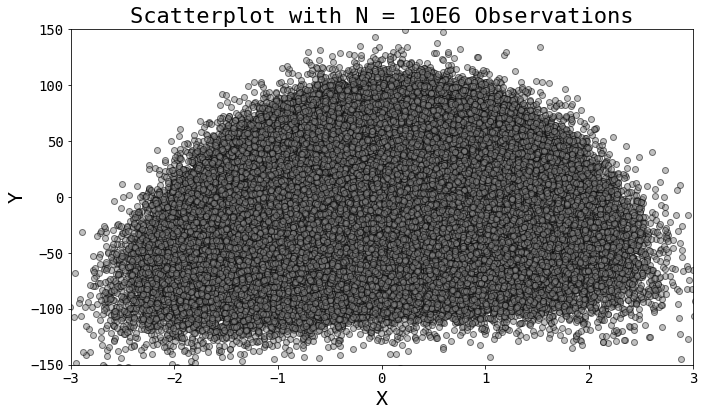

In [16]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(data.x, data.y, edgecolor ='k', facecolor = '0.5', alpha = 0.5)
ax.set_title(f'Scatterplot with N = 10E{ord_magnitude} Observations')
ax.axis([-3, 3, -150, 150])
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

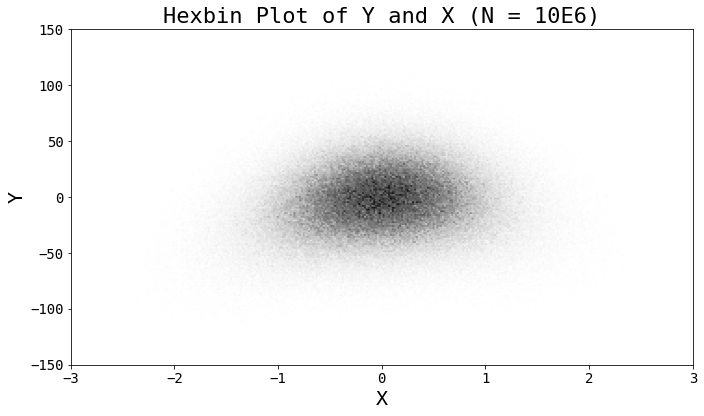

In [17]:
# let's try a Hexbin plot
fig, ax = plt.subplots(figsize = (10,6))
ax.hexbin(data.x, data.y, gridsize=400, cmap='Greys')
ax.axis([-3, 3, -150, 150])
ax.set_title(f'Hexbin Plot of Y and X (N = 10E{ord_magnitude})')
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [18]:
def spline_smoother(y,x,K, drop_outliers = False, qmin = 0.05, qmax = 0.95):
    '''
    Fit a cubic-spline smoother
    y: vertical axis on the scatter
    x: horizontal axis on the scatter
    K: number of knots for the spline
    drop_outliers: Boolean to drop outliers
        If True use the quantiles (qmin, qmax)
    Returns:
        DF with original data (x,y) and a smoothed estimate of y (yhat)
    Source: Elements of Statistical Learning (Hastie, et.al) Ch.5
    '''
    N = y.shape[0]
    y_arr = y.values.reshape((N,1))
    x_arr = x.values.reshape((N,1))
    # grid: drop the tails
    if drop_outliers:
        qmin*=100
        qmax*=100
        nod_grid = np.percentile(x_arr, np.linspace(qmin, qmax, K))
    else:
        nod_grid = np.percentile(x_arr, np.linspace(0, 100, K))
    # Positive parts matrix
    xpos_mat = np.zeros((N,K))
    for k in range(K):
        xpos_mat[:,k] = ((x_arr>nod_grid[k])*(x_arr-nod_grid[k])**3).flatten()

    # concat everything
    xmat = np.concatenate((np.ones((N,1)),x_arr, np.power(x_arr,2), np.power(x_arr,3),
                           xpos_mat), axis=1)
    # run a linear regression 
    mod = LinearRegression()
    mod.fit(xmat, y_arr)
    # predict
    yest = mod.predict(xmat)
    # organize results in a dataframe
    df_results = pd.DataFrame(columns = ['y', 'yhat', 'x'], index = y.index)
    df_results['y'] = y
    df_results['yhat'] = yest
    df_results['x'] = x
    df_results.sort_values(by='x', ascending = True, inplace = True)
    return df_results

In [19]:
smoother_df = spline_smoother(y=data.y, x=data.x, K=3, drop_outliers=False)
smoother_df.head(1)

,y,yhat,x
565519,-155.365012,-148.275391,-3.623245


Text(0, 0.5, 'Y')

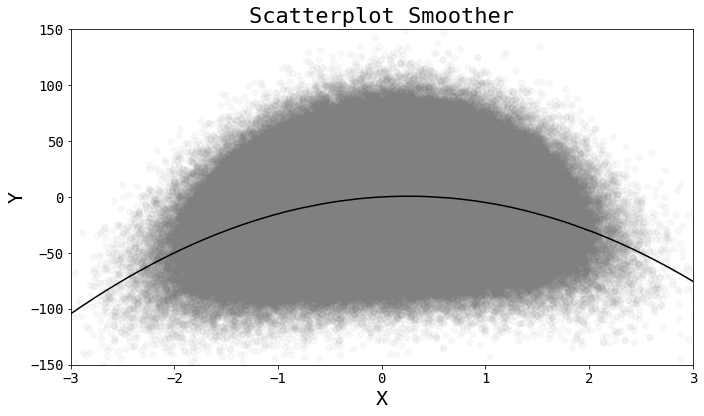

In [20]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(data.x, data.y, color = '0.5', alpha = 0.05)
ax.plot(smoother_df.x, smoother_df.yhat, color = 'k')
ax.set_title(f'Scatterplot Smoother')
ax.axis([-3, 3, -150, 150])
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [21]:
def plot_scatterplot_sample(x, y, ax, sample_frac, seed=None, **kwargs):
    """
    Return a scatterplot with a random selection of observations
       This is a wrapper of Matplotlib's scatter function
    Inputs:
        x,y: same as in Matplotlib's scatterplot
        ax: axis object for the plot
        sample_frac: number between 0 and 1
           fraction of observations to be randomly selected
        seed: a valid seed for your random selection
           Necessary to replicate your plot
        **kwargs: Matplotlib's scatter additional arguments: right now only 'color'
    """
    # randomly select a subsample
    nobs = len(x)
    nobs_to_sample = int(sample_frac*nobs)
    if seed is not None:
        np.random.seed(seed)
    ids_sample = np.random.choice(nobs, nobs_to_sample, replace = True)
    x_sam, y_sam = x[ids_sample], y[ids_sample]
    # plot scatter
    if 'color' in kwargs:
        color = kwargs['color']
    ax.scatter(x_sam, y_sam, color = color)
    return ax, nobs_to_sample

Text(0.5, 0, 'X')

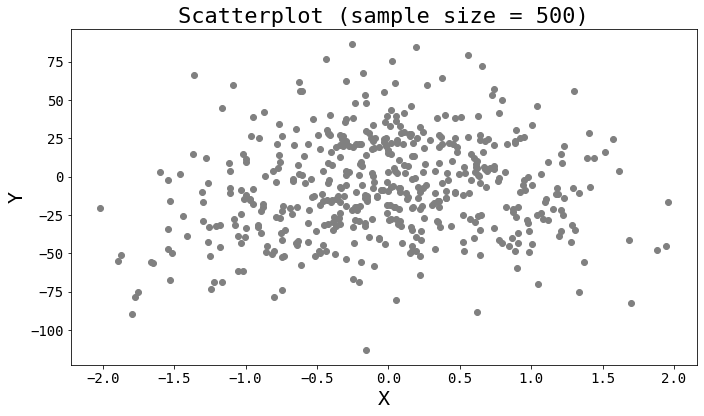

In [22]:
# plot a subsample
fig, ax = plt.subplots(figsize = (10,6))
ax, nobs_smp = plot_scatterplot_sample(x=data.x, y=data.y, ax=ax, sample_frac = 0.0005, seed=13145, color = '0.5')
ax.set_title(f'Scatterplot (sample size = {nobs_smp})')
ax.set_ylabel('Y')
ax.set_xlabel('X')

Text(0.5, 0, 'X')

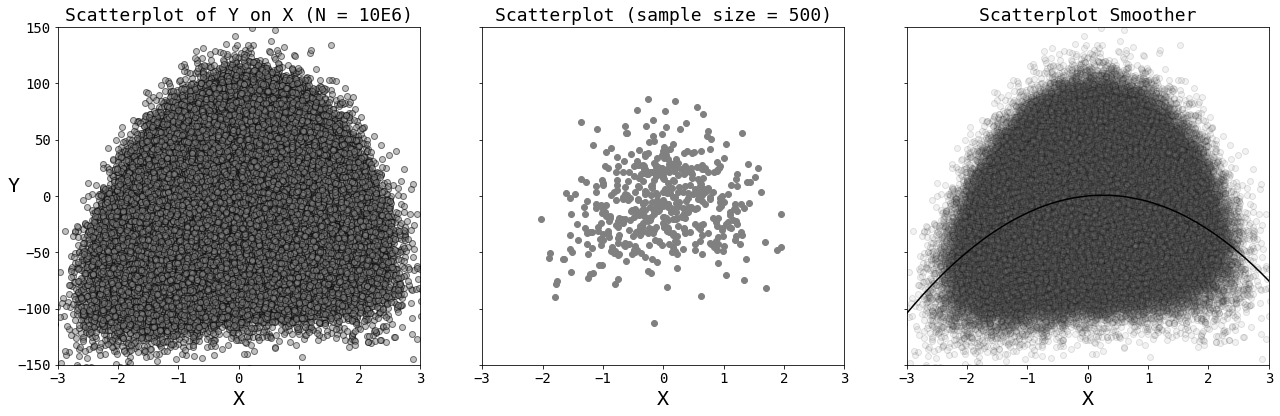

In [23]:
# Use both plots
fig, ax = plt.subplots(1,3, figsize = (18,6), sharex=True, sharey=True)
# plot 1: regular scatter plot
fontsze = 18
ax[0].scatter(data.x, data.y, edgecolor='k', facecolor = '0.5', alpha = 0.5)
ax[0].set_title(f'Scatterplot of Y on X (N = 10E{ord_magnitude})', fontsize=fontsze)
ax[0].axis([-3, 3, -150, 150])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y', rotation=0)
# plot 2: smoother
ax[2].scatter(data.x, data.y, edgecolor ='k', facecolor = '0.5', alpha = 0.1)
ax[2].plot(smoother_df.x, smoother_df.yhat, color = 'k')
ax[2].set_title(f'Scatterplot Smoother', fontsize=fontsze)
ax[2].axis([-3, 3, -150, 150])
ax[2].set_xlabel('X')
# plot 3: random sample
ax3, nobs_smp = plot_scatterplot_sample(x=data.x, y=data.y, ax=ax[1], sample_frac = 0.0005, seed=13145, color = '0.5')
ax3.set_title(f'Scatterplot (sample size = {nobs_smp})', fontsize=fontsze)
ax3.set_xlabel('X')
ax3.axis([-3, 3, -150, 150])
ax3.set_xlabel('X')

## Plotting distributions
Things I want to show:
1. Printing out quantiles
2. Plotting quantiles: box plot
3. Histograms vs. Kernel Density estimates

In [24]:
# sample from a mixture of normals
np.random.seed(20321)
nobs = 1000
uniform = np.random.rand(nobs)
grid_uni = [0.3,0.7]
mix_rand = []
# normal parameters
mean1, var1 = 10, 1
mean2, var2 = 20, 5
for i in range(nobs):
    if uniform[i] < 0.3: # first normal sampling
        yi = mean1 + np.sqrt(var1)*np.random.randn(1)
    else:
        yi = mean2 + np.sqrt(var2)*np.random.randn(1)

    mix_rand.append(yi[0])

df_mg = pd.DataFrame(mix_rand, columns = ['mixed_rnd'])
df_mg.head(1)

,mixed_rnd
0,22.317444


Text(0.5, 1.0, '5-tiles for data')

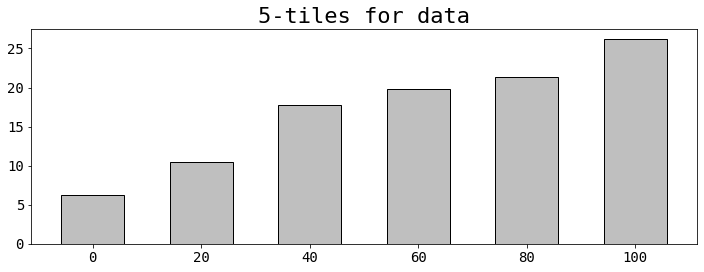

In [25]:
# let's start by plotting quantiles
def plot_quantiles(data, num_quantiles, ax, kind = 'bar'):
    """
    Plot the quantiles of your data
    Input:
        data: array or Series with your metric
        num_quantiles: integer number of quantiles you want to plot (eg. 10=deciles)
        ax: axis object to store your results
        kind: bar or line plot
    Output:
        An axis object with desired plot
    """
    ptiles = pd.Series(np.linspace(0,1,num_quantiles+1)*100).rename('percentile')
    quantiles = np.percentile(data, ptiles)
    df_q = pd.DataFrame(quantiles, index = ptiles, columns = ['quantiles'])
    # confirm that empirical frequencies match with percentiles
    df_q['empirical_fqc'] = np.nan
    for p, ptl in enumerate(ptiles):
        frac_p = 100*np.mean(data < df_q.quantiles.loc[ptl])
        df_q.empirical_fqc.loc[ptl] = frac_p
    # plot
    #df_q.quantiles.plot(ax=ax, color='k', kind=kind)
    es_frac = 0.9 # empty space as a fraction of bar width
    bw = (100/(num_quantiles + (num_quantiles-1)*es_frac)) # width of the bars
    if kind == 'bar':
        ax.bar(df_q.index, df_q.quantiles, edgecolor = 'k', facecolor = '0.75', width = bw,)
    elif kind == 'line':
        ax.plot(df_q.index, df_q.quantiles, color = 'k',)
    ax.set_xticks(df_q.index)
    ax.set_xticklabels([int(np.around(x,decimals=0)) for x in df_q.index], rotation=0)
    return ax

fig, ax = plt.subplots(figsize =(10,4))
n_qtile = 5
ax = plot_quantiles(data=df_mg.mixed_rnd, num_quantiles=n_qtile, ax=ax, kind = 'bar')
ax.set_title(f'{n_qtile}-tiles for data')
#ax = plot_quantiles(data=df_mg.mixed_rnd, num_quantiles=5, ax=ax, kind = 'line')

#### Notes on last visualization
* Not the best one
* True: you plot the quantiles
* But hard to know what to make of these
* It's common to plot them against a benchmark with a QQ plot

In [26]:
# This last visualization is hard to use for anything, since we don't have a benchmark to compare
# Q-Q plots plot quantiles against a normal distribution
def plot_qq_normal(data, num_quantiles, ax):
    """
    Plot a QQ plot for a normal distribution
    Input:
        data: array or Series with your metric
        num_quantiles: integer number of quantiles you want to plot (eg. 10=deciles)
        ax: axis object to store your results
    Output:
        An axis object with desired plot
    """
    # standardize data
    data_norm = (data - np.mean(data))/np.std(data)
    #print(np.mean(data_norm), np.std(data_norm)) <-- check correct standardization
    ptiles = pd.Series(np.linspace(0,1,num_quantiles+1)*100).rename('percentile')
    quantiles = np.percentile(data_norm, ptiles)
    df_q = pd.DataFrame(quantiles, index = ptiles, columns = ['quantiles'])
    # Get corresponding Normal percentile
    df_q['normal_quantile'] = np.nan
    for p, ptl in enumerate(ptiles):
        qtile_p = norm.ppf(ptl/100) # using the inverse of CDF to get the quantile
        df_q.normal_quantile.loc[ptl] = qtile_p
    # ready to plot
    ax.plot(df_q.normal_quantile, df_q.quantiles, color='0.3', marker='o')
    # plot diagonal
    ax.plot(df_q.normal_quantile, df_q.normal_quantile, ls = '--', color='k')
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel('Observed quantiles')
    ax.set_title('QQ-plot')
    ax.legend(['Observed', 'Theoretical'])
    return ax

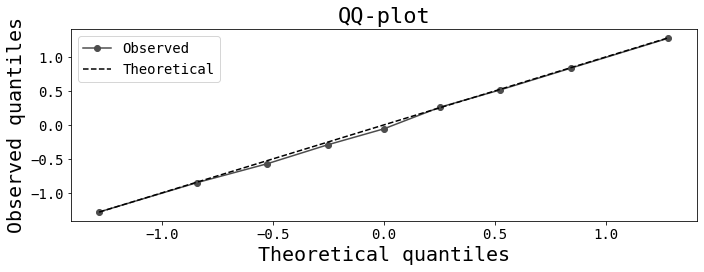

In [27]:
# test function with a normal distribution
fig, ax = plt.subplots(figsize =(10,4))
np.random.seed(11002)
data_nrm = 10 + np.random.randn(500) # you can play with the sample size to check changes
n_tiles = 10
plot_qq_normal(data=data_nrm, num_quantiles=n_tiles, ax=ax)

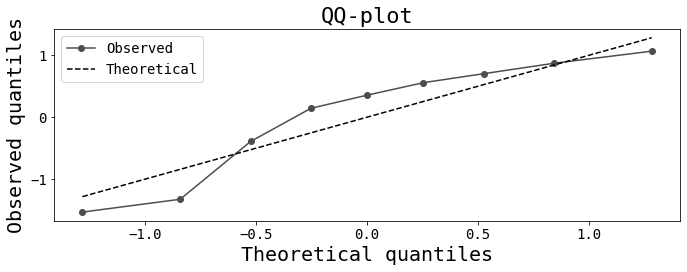

In [28]:
# Plot our simulated data against a Normal distribution
fig, ax = plt.subplots(figsize =(10,4))
n_tiles = 10
plot_qq_normal(data=df_mg.mixed_rnd, num_quantiles=n_tiles, ax=ax)

### Kernel density estimates plots
* Understand the differences between the scales of the vertical axis
* Histograms and plots of quantiles
* KDEs

Text(0.5, 1.0, 'Mixture of Normals: KDE')

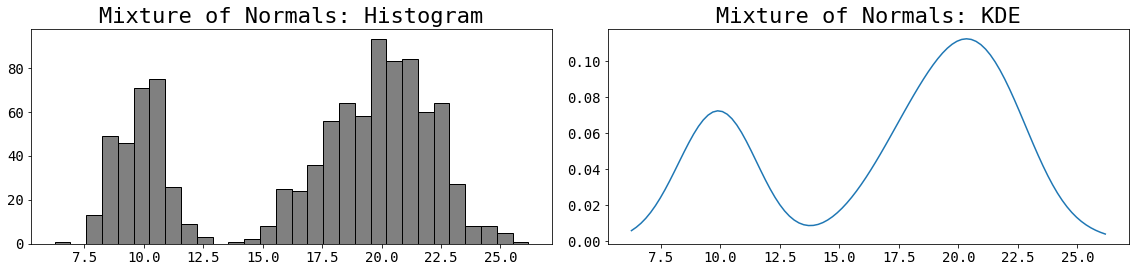

In [29]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
# first a histogram
df_mg.hist(ax = ax[0], bins=30, grid = False, color = '0.5', edgecolor='k')
ax[0].set_title('Mixture of Normals: Histogram')
# second a kernel density plot
density = gaussian_kde(df_mg.mixed_rnd)
gridx = np.linspace(df_mg.mixed_rnd.min(),df_mg.mixed_rnd.max(),100).flatten()
# Commented out lines below should help you customize bandwidth selection
#density.covariance_factor = lambda : 10
#density._compute_covariance()
y_kde = density(gridx)
ax[1].plot(gridx,y_kde)
ax[1].set_title('Mixture of Normals: KDE')

Text(0.5, 0, 'Grid Size')

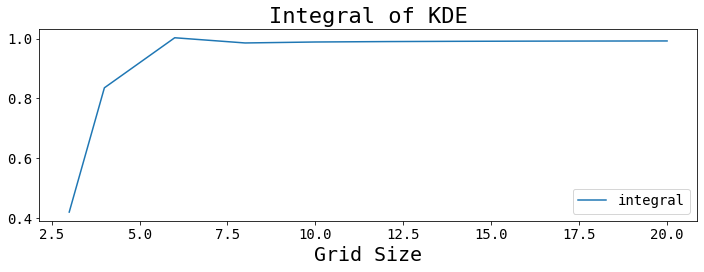

In [30]:
# let's check what's going on with the vertical axis for the KDE
def integrate_kde(data, grid_size, drop_nans = False):
    """
    Find the area under the curve of a KDE for a given grid_size
        Using Numpy's composite trapezoidal (trapz) method to integrate
    Inputs:
        data: an array with the observations to calculate a distribution (no NaNs allowed)
        grid_size: size of the grid where you want the KDE to be calculated
        drop_nans: Boolean if you want to drop null values
    """
    if drop_nans:
        data = data[np.isnan(data) == False] # drop NaNs
    density = gaussian_kde(data)
    gridx = np.linspace(df_mg.mixed_rnd.min(),df_mg.mixed_rnd.max(),grid_size).flatten()
    kde = density(gridx)
    integral = np.trapz(y = kde, x=gridx)
    return integral

grd_test = [int(x) for x in np.linspace(3,20, 10)]
df_test = pd.DataFrame(index = grd_test, columns =['integral'])
for g,grd in enumerate(grd_test):
    int_g = integrate_kde(data=df_mg.mixed_rnd, grid_size = grd, drop_nans = False)
    df_test.integral.loc[grd] = int_g

df_test.plot()
plt.title('Integral of KDE')
plt.xlabel('Grid Size')

In [31]:
def rescale_axis(data1, data2):
    """
    Rescale data1 to data2's scale:
    If data1 ~ [a,b] and data2 ~ [c,d]
    then to rescale: rescaled(data1) = c + (d-c)*(data1-a)/(b-a)
    Inputs:
        data1, data2: arrays of two sets of data
    Returns:
        rescaled data1 to data2's scale (same shape as data1)
    """
    min1, max1 = np.min(data1), np.max(data1)
    min2, max2 = np.min(data2), np.max(data2)
    rescaled_y = min2 + (max2 - min2)*(data1 - min1)/(max1 - min1)
    return rescaled_y

Text(0.5, 1.0, 'Histogram and Gaussian KDE Plot')

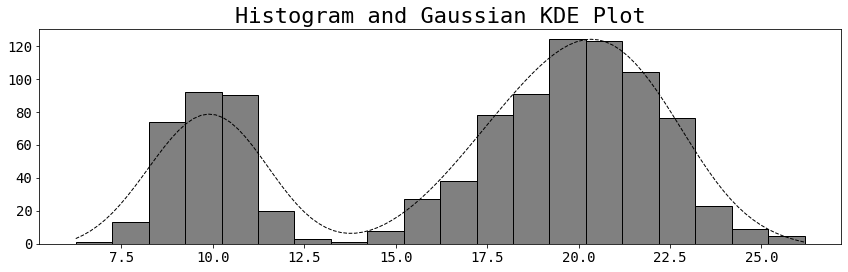

In [32]:
# this is the actual plot I used in the book to get the scale for the KDE right
test1 = density(gridx)
nbins = 20
test2,_ = np.histogram(df_mg.mixed_rnd, bins=nbins)
rescaled = rescale_axis(test1, test2)
fig, ax = plt.subplots(figsize=(12,4))
df_mg.hist(ax=ax, bins=nbins, grid = False, color = '0.5', edgecolor='k')
ax.plot(gridx, rescaled, color = 'k', lw=1, ls = '--')
ax.set_title('Histogram and Gaussian KDE Plot')

### let's plot shifts in a distribution


In [33]:
np.random.seed(21135)
# simulate several Gamma distributions for which the shape parameter drifts
nobs = 100
n_dist = 10
df_gamma = pd.DataFrame(index = range(nobs), columns = [f't{num}' for num in range(n_dist)])
for t in range(n_dist):
    shape_t = (t+1)
    rnd_t = np.random.gamma(shape_t, scale=1.0, size=nobs)
    df_gamma[f't{t}'] = rnd_t
df_gamma.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9
0,1.308934,2.201814,4.317203,6.128512,6.347185,5.231255,6.382613,12.281805,15.656608,8.604290
1,2.642429,4.609295,2.270752,11.739841,5.113375,6.553439,6.784642,6.023756,5.067316,11.910534
2,0.756497,1.236828,2.384140,4.198556,8.899573,3.314259,8.224985,9.147593,8.965180,18.793461
3,1.390340,1.462785,0.854660,2.408520,3.004453,4.921428,7.427239,4.987322,9.286401,12.063493
4,0.359074,1.778945,4.575513,5.048821,5.079321,4.333727,7.792103,7.877381,7.616881,10.767398


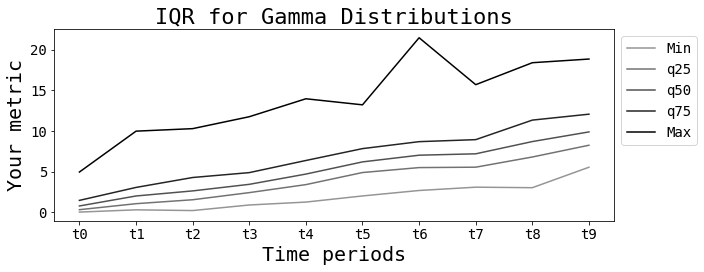

In [34]:
# compute quintiles
num_ptiles = 5
list_ptiles = np.linspace(0,1,num_ptiles)
df_box = pd.DataFrame(columns = df_gamma.columns, index = list_ptiles)
# plot
fig,ax = plt.subplots(figsize = (10,4))
df_quantile = df_gamma.quantile(list_ptiles).T
# use a colormap scale for the plot (here black and white because of paper printing)
colors = plt.cm.Greys(np.linspace(0.5,1,num_ptiles))
df_quantile.plot(ax=ax, color=colors)
# finally fix x-axis and other details
ax.set_xticks(range(len(df_gamma.columns)))
ax.set_xticklabels(df_gamma.columns)
ax.set_title('IQR for Gamma Distributions')
legend_labs = [f'q{int(100*ptile)}' for ptile in list_ptiles]
dict_labs = {'q0':'Min', 'q100':'Max'}
new_labs = [lab if lab not in dict_labs else dict_labs[lab] for lab in legend_labs ]
ax.legend(new_labs,bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Time periods')
ax.set_ylabel('Your metric')
print('')

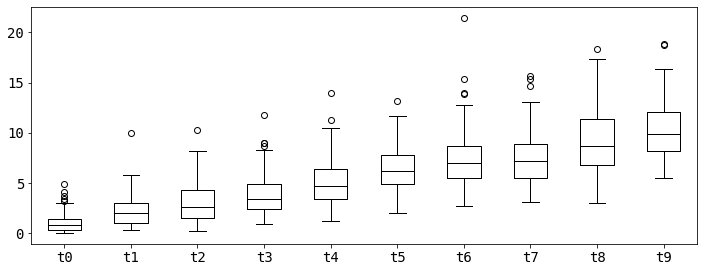

In [35]:
# alternatively: box plots
fig, ax = plt.subplots(figsize=(10,4))
df_gamma.boxplot(ax=ax, grid=False, color ='k')

Text(0.5, 0, 'Time periods')

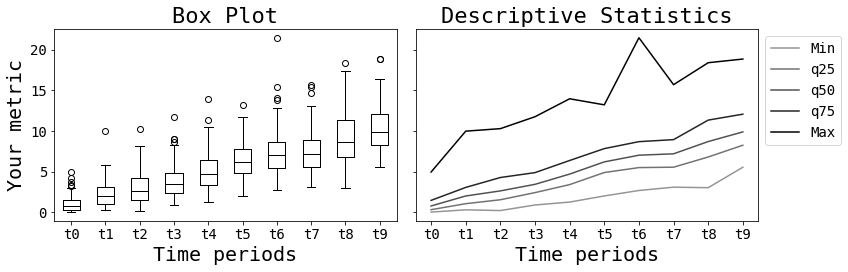

In [36]:
# both plots in a figure
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)
# box plot first
df_gamma.boxplot(ax=ax[0], grid=False, color ='k')
ax[0].set_title('Box Plot')
# percentiles
df_quantile.plot(ax=ax[1], color=colors)
# finally fix x-axis and other details
ax[1].set_xticks(range(len(df_gamma.columns)))
ax[1].set_xticklabels(df_gamma.columns)
ax[1].set_title('Descriptive Statistics')
legend_labs = [f'q{int(100*ptile)}' for ptile in list_ptiles]
dict_labs = {'q0':'Min', 'q100':'Max'}
new_labs = [lab if lab not in dict_labs else dict_labs[lab] for lab in legend_labs ]
ax[1].legend(new_labs,bbox_to_anchor=(1.0, 1.0))
ax[1].set_xlabel('Time periods')
ax[0].set_ylabel('Your metric')
ax[0].set_xlabel('Time periods')

Text(0.5, 0, 'Time periods')

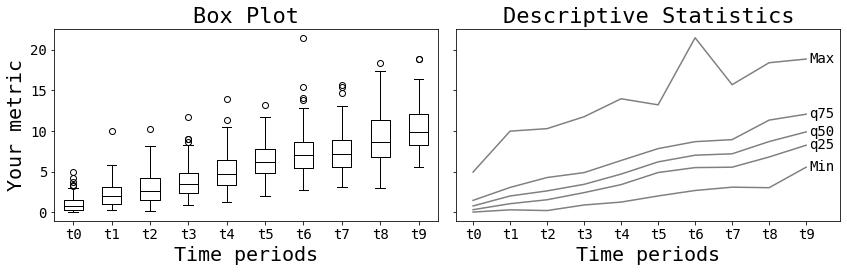

In [37]:
# replace the legend with text
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)
# box plot first
df_gamma.boxplot(ax=ax[0], grid=False, color ='k')
ax[0].set_title('Box Plot')
# percentiles
df_quantile.plot(ax=ax[1], color='0.5')
# finally fix x-axis and other details
ax[1].set_xticks(range(len(df_gamma.columns)))
ax[1].set_xticklabels(df_gamma.columns)
ax[1].set_title('Descriptive Statistics')
legend_labs = [f'q{int(100*ptile)}' for ptile in list_ptiles]
dict_labs = {'q0':'Min', 'q100':'Max'}
new_labs = [lab if lab not in dict_labs else dict_labs[lab] for lab in legend_labs]
xticks1 = ax[1].get_xticks()
ax[1].get_legend().remove()
for c,col in enumerate(df_quantile.columns):
    x_c = 1.01*xticks1[-1]
    y_c = df_quantile[col].loc[df_quantile.index[-1]]
    ax[1].text(x_c, y_c, new_labs[c], verticalalignment='center', horizontalalignment='left')

# Need to change the axis object to fit the labels
xmin, xmax = ax[1].get_xlim()
ymin, ymax = ax[1].get_ylim()
ax[1].axis([xmin, 1.05*xmax, ymin, ymax])
ax[1].set_xlabel('Time periods')
ax[0].set_ylabel('Your metric')
ax[0].set_xlabel('Time periods')

Text(0, 0.5, 'Your Metric')

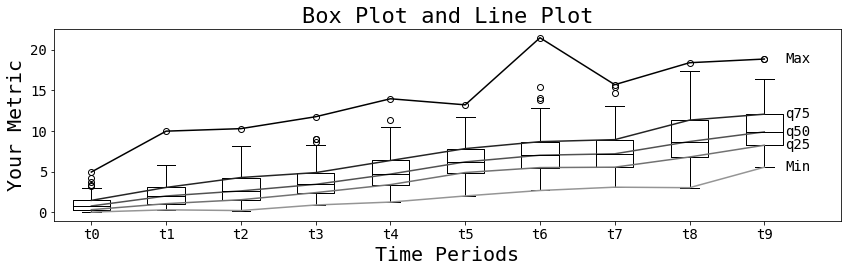

In [38]:
# both plots in a figure: it's super cluttered!  
# Not a good choice (but good to experiment with several types)
fig, ax = plt.subplots(1,1, figsize=(12,4), sharey=True)
# box plot first
df_gamma.boxplot(ax=ax, grid=False, color ='k')
ax.set_title('Box Plot and Line Plot')
xticks = ax.get_xticks()
# percentiles
for c, col in enumerate(df_quantile.columns):
    ix_c = df_quantile.index[c]
    ax.plot(xticks, df_quantile[col], color = colors[c])
    # include labels
    x_c = 1.02*xticks1[-1]
    y_c = df_quantile[col].loc[df_quantile.index[-1]]
    ax.text(x_c+1.1, y_c, new_labs[c], verticalalignment='center', horizontalalignment='left')
# extra space for the labels
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.axis([xmin, 1.05*xmax, ymin, ymax])
ax.set_xlabel('Time Periods')
ax.set_ylabel('Your Metric')

### Colors as a third variable

Text(2, -10, 'Bad segment!')

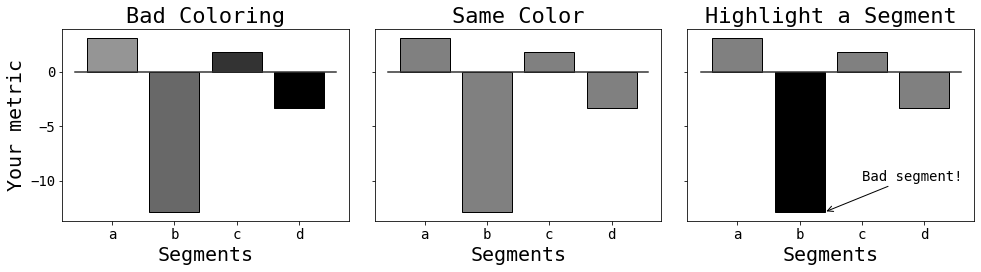

In [39]:
# simulate some data
num_cats = 4
np.random.seed(12153)
data = 10*np.random.randn(num_cats)
cats = alphabet[:num_cats]

fig, ax = plt.subplots(1,3, figsize=(14,4),sharey=True)
colors = plt.cm.Greys(np.linspace(0.5,1,num_cats))
ax[0].bar(range(num_cats), data, color = colors, edgecolor='k')
xmin, xmax = ax[0].get_xlim()
ax[0].plot([xmin,xmax],[0,0], ls = '-', color = '0.2')
ax[0].set_xticks(range(num_cats))
ax[0].set_xticklabels(cats)
ax[0].set_title('Bad Coloring')
ax[0].set_xlabel('Segments')
ax[0].set_ylabel('Your metric')
# fix this coloring
ax[1].bar(range(num_cats), data, color = '0.5', edgecolor='k')
ax[1].set_xticks(range(num_cats))
ax[1].set_xticklabels(cats)
ax[1].plot([xmin,xmax],[0,0], ls = '-', color = '0.2')
ax[1].set_title('Same Color')
ax[1].set_xlabel('Segments')
# highlight one segment
ax[2].bar(range(num_cats), data, color = '0.5', edgecolor='k')
ax[2].bar(1,data[1], color='k')
ax[2].set_xticks(range(num_cats))
ax[2].set_xticklabels(cats)
ax[2].plot([xmin,xmax],[0,0], ls = '-', color = '0.2')
ax[2].set_title('Highlight a Segment')
ax[2].set_xlabel('Segments')
ax[2].annotate("Bad segment!",
            xy=(1.4, data[1]), xytext=(2, -10),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))

### Bubble plots

In [123]:
# we need three variables
np.random.seed(26191)
size = 20
x = np.sqrt(0.1)*np.random.gamma(shape = 1, scale=1, size = size) # x~N(0.1,10)
y = 20 + 10*x + np.sqrt(10)*np.random.randn(size) # y = a + bx + noise
prez = 20+ 35*x*y 
z = [1*int(np.abs(val)) for val in prez] # this will be the radius z = scaled(abs(f(x,y)))
print(z)

[48, 1133, 435, 283, 29, 1902, 33, 53, 31, 83, 128, 33, 67, 68, 305, 55, 405, 35, 75, 842]


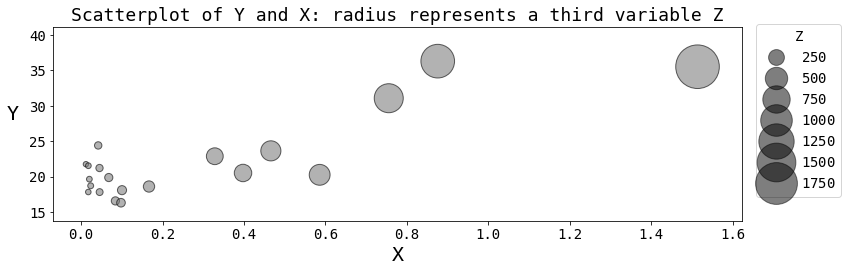

In [145]:
fig, ax = plt.subplots(figsize=(12,4))
scatter = ax.scatter(x,y, s=z, edgecolor='k', facecolor='0.5', alpha=0.6)
ax.set_title('Scatterplot of Y and X: radius represents a third variable Z', fontsize=18)
ax.set_ylabel('Y  ', rotation=0)
ax.set_xlabel('X')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.axis([xmin, xmax, 0.9*ymin, 1.1*ymax]) # ensure that all markers fit nicely
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# legend
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels,  title="Sizes", bbox_to_anchor=(1.2, 1.05))
kw = dict(prop="sizes", num=8, alpha=0.5)
ax.legend(*scatter.legend_elements(**kw),title="Z", bbox_to_anchor=(1.01, 1.05))

Text(0.5, 1.0, 'Z')

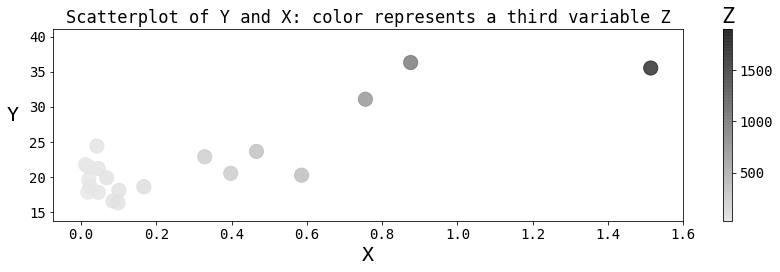

In [186]:
# another alternative with a colorbar
fig, ax = plt.subplots(figsize=(12,4))
N = len(z)
sc = ax.scatter(x, y, alpha=0.8, s=200, c = z, vmin = np.min(z), vmax = np.max(z),
               cmap=LinearSegmentedColormap.from_list('', [(0.9, 0.9, 0.9,1),(0.15, 0.15, 0.15,1),]))
ax.set_title('Scatterplot of Y and X: color represents a third variable Z', fontsize=17)
ax.set_ylabel('Y  ', rotation=0)
ax.set_xlabel('X')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.axis([xmin, xmax, 0.9*ymin, 1.1*ymax]) # ensure that all markers fit nicely
cbar = fig.colorbar(sc)
cbar.ax.set_title('Z')